In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.font_manager  
import pandas as pd
from sklearn import svm  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve,confusion_matrix,classification_report
plt.style.use('seaborn')

In [2]:
d = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Road/CDI_Based/Intensity/CSV/Optical_Mag.csv',index_col=0)
d.Class[d['Class']==1] = -1
d.Class[d['Class'] == 0] = 1
display(d.head())

<ipython-input-2-51009282fef0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class']==1] = -1
<ipython-input-2-51009282fef0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class'] == 0] = 1


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,Class
0,988.3669,175.44109,361.91776,247.36005,108.59085,116.81109,755.51210,415.54663,459.68686,439.56410,...,345.47638,67.87378,76.579500,609.87380,2704.8977,596.11110,294.66406,132.17860,343.93466,1
1,930.0564,1790.42130,1249.79020,1067.55140,1505.53200,467.05390,902.11035,1108.90970,540.39185,537.02990,...,603.08600,578.08770,1551.111600,926.32623,2544.8142,532.60370,1373.94750,699.61945,483.91727,1
2,3066.5469,3238.57370,2752.17680,1091.76390,1159.73120,1869.87040,1728.60230,1610.73170,915.92730,881.10730,...,723.75476,543.95416,393.835240,440.70917,1096.1488,634.36890,568.96075,591.53920,9152.49700,1
3,1458.1394,1689.23700,1215.58620,1421.97580,240.49838,212.49644,994.62440,856.21370,2017.43130,544.82825,...,5081.18550,69.44509,44.604267,794.06335,2358.5027,663.01220,757.42084,3496.48400,4767.00630,1
4,798.3445,571.96800,351.84625,729.98910,162.76010,183.91235,259.22333,349.06876,798.98870,707.75950,...,1399.53600,124.36855,176.134580,284.57736,1291.4895,505.92578,1592.64980,151.43918,317.40497,1


In [3]:
data = d
mask = (data['Class'] == 1)

X_train, X_test = train_test_split(data[mask], test_size=0.2, random_state=0)
X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)
X_fraud = data[~mask].drop(['Class'], axis=1)

x_test=np.vstack((X_test,X_fraud))
y_test=[1]*len(X_test)+[-1]*len(X_fraud)

std =StandardScaler()
X_train=std.fit_transform(X_train)
x_test=std.transform(x_test)


In [4]:
clf = svm.OneClassSVM(kernel='rbf',nu=0.6)  
clf.fit(X_train)  

y_pred = clf.predict(x_test)  
y_prob = clf.decision_function(x_test)  # the lower, the more normal

fpr,tpr,threshold_svc = metrics.roc_curve(y_test,y_prob)     
auc_svc = metrics.auc(fpr,tpr)   

precision, recall, _ = precision_recall_curve(y_test,y_prob)
pr_auc = auc(recall, precision)

score_svc = metrics.accuracy_score(y_test,y_pred)

print(score_svc)
print(classification_report(y_test, y_pred))

0.75177304964539
              precision    recall  f1-score   support

          -1       0.79      0.88      0.84       101
           1       0.59      0.42      0.49        40

    accuracy                           0.75       141
   macro avg       0.69      0.65      0.66       141
weighted avg       0.74      0.75      0.74       141



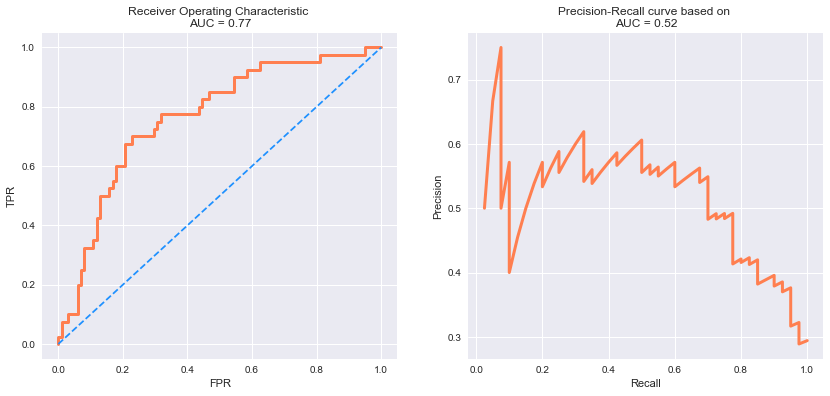

In [5]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
#plt.figure(figsize=(14, 6))
plt.title('Receiver Operating Characteristic \nAUC = %0.2f'% auc_svc)   
plt.plot(fpr, tpr, c='coral', lw=3)
plt.plot([0,1],[0,1], c='dodgerblue', ls='--')
plt.ylabel('TPR'); plt.xlabel('FPR')

plt.subplot(122)
plt.title('Precision-Recall curve based on \nAUC = %0.2f'% pr_auc)
plt.plot(recall[:-2], precision[:-2], c='coral', lw=3)
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.show()